In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [8]:
# df = pd.read_csv('/kaggle/input/urinary-biomarkers-for-pancreatic-cancer/Debernardi et al 2020 data.csv')
from google.colab import drive
drive.mount('/content/gdrive')
df = pd.read_csv("/content/gdrive/My Drive/pancreatic_cancer/Debernardi et al 2020 data.csv")
cols = df.columns.to_list()
df.diagnosis = df.diagnosis == 3
df.sex = df.sex.map({'M': 1, 'F': 0})
df = df[['creatinine',
         'plasma_CA19_9',
         'age',
         'sex',
         'LYVE1',
         'REG1B',
         'TFF1',
         'diagnosis']].copy()
## Turn multiclass problem into binary classification problem, it gives best results (tested but not shown in the final version) ##
df.head(20)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,creatinine,plasma_CA19_9,age,sex,LYVE1,REG1B,TFF1,diagnosis
0,1.83222,11.7,33,0,0.893219,52.94884,654.282174,False
1,0.97266,NaN,81,0,2.037585,94.46703,209.488250,False
2,0.78039,7.0,51,1,0.145589,102.36600,461.141000,False
3,0.70122,8.0,61,1,0.002805,60.57900,142.950000,False
4,0.21489,9.0,62,1,0.000860,65.54000,41.088000,False
5,0.84825,NaN,53,1,0.003393,62.12600,59.793000,False
6,0.62205,NaN,70,1,0.174381,152.27700,117.516000,False
7,0.89349,11.0,58,0,0.003574,3.73000,40.294000,False
8,0.48633,NaN,59,0,0.001945,7.02100,26.782000,False
9,0.61074,24.0,56,0,0.278778,83.92800,19.185000,False


In [9]:
no_cancer=df[df['diagnosis']==False]
cancer=df[df['diagnosis']==True]

In [6]:
df.describe()

,creatinine,plasma_CA19_9,age,sex,LYVE1,REG1B,TFF1
count,590.000000,350.000000,590.000000,590.000000,590.000000,590.000000,590.000000
mean,0.855383,654.002944,59.079661,0.493220,3.063530,111.774090,597.868722
std,0.639028,2430.317642,13.109520,0.500378,3.438796,196.267110,1010.477245
min,0.056550,0.000000,26.000000,0.000000,0.000129,0.001104,0.005293
25%,0.373230,8.000000,50.000000,0.000000,0.167179,10.757216,43.961000
50%,0.723840,26.500000,60.000000,0.000000,1.649862,34.303353,259.873974
75%,1.139482,294.000000,69.000000,1.000000,5.205037,122.741013,742.736000
max,4.116840,31000.000000,89.000000,1.000000,23.890323,1403.897600,13344.300000


In [10]:
no_cancer.describe()

,creatinine,plasma_CA19_9,age,sex,LYVE1,REG1B,TFF1
count,391.000000,200.000000,391.000000,391.000000,391.000000,391.000000,391.000000
mean,0.824389,37.389102,55.465473,0.447570,1.676618,53.481596,317.567397
std,0.589820,175.130566,12.831780,0.497881,2.210807,95.214504,526.062049
min,0.056550,0.000000,26.000000,0.000000,0.000129,0.001104,0.005293
25%,0.361920,4.573765,46.000000,0.000000,0.005011,6.812804,18.899000
50%,0.723840,10.000000,55.000000,0.000000,0.656365,19.703000,115.200795
75%,1.131000,22.250000,65.000000,1.000000,2.537637,57.682067,424.359000
max,3.449550,1913.000000,89.000000,1.000000,11.040100,864.366930,4461.684000


In [11]:
cancer.describe()

,creatinine,plasma_CA19_9,age,sex,LYVE1,REG1B,TFF1
count,199.000000,150.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,0.916281,1476.154733,66.180905,0.582915,5.788567,226.308587,1148.611527
std,0.723810,3550.038158,10.509132,0.494321,3.779988,277.196827,1425.590658
min,0.079170,0.600000,29.000000,0.000000,0.001267,1.651784,0.021172
25%,0.407160,99.700000,59.000000,0.000000,2.676403,39.318772,330.624549
50%,0.723840,427.500000,67.000000,1.000000,5.621266,123.104730,722.523000
75%,1.193205,1457.500000,74.000000,1.000000,8.193758,284.612920,1403.359718
max,4.116840,31000.000000,88.000000,1.000000,23.890323,1403.897600,13344.300000


In [12]:
for key in df.keys():
  print(key)
  print(df[key].isnull().values.any())

creatinine
False
plasma_CA19_9
True
age
False
sex
False
LYVE1
False
REG1B
False
TFF1
False
diagnosis
False


In [13]:
df=df.fillna(654.002944)

In [14]:
from sklearn.model_selection import train_test_split
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
print(X_train)

     creatinine  plasma_CA19_9  age  sex     LYVE1       REG1B         TFF1
131     1.39113     654.002944   56    1  2.984651   48.119630   269.088550
153     0.74646     654.002944   58    0  1.600313   17.583370    87.172984
77      0.53157       0.000000   50    0  0.005046    5.381445     5.046098
439     0.66729      74.000000   67    0  8.929678  374.512950  3103.221000
255     2.18283     323.000000   59    1  8.992460  193.983300  1683.165600
..          ...            ...  ...  ...       ...         ...          ...
71      0.19227       3.527344   26    0  0.000906   13.027030     0.906008
106     1.49292     654.002944   49    0  0.924148   18.826000   124.278000
270     0.50895      24.000000   50    1  4.053587   19.777954  2206.531800
435     1.13100     476.000000   61    0  6.598519   89.432420   345.623553
102     0.19227       6.940000   51    1  0.571181    3.099211    39.729131

[472 rows x 7 columns]


In [16]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.tree import plot_tree
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X = df.drop('diagnosis', axis=1)
y = df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


knn = KNeighborsClassifier(n_neighbors = 5)
log = LogisticRegression(max_iter = 1000)
dt = DecisionTreeClassifier(max_depth = 3)

In [17]:
knn.fit(X_train, y_train)
log.fit(X_train, y_train)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [18]:
# they might use accuracy_score
y_pred = knn.predict(X_test)
score = accuracy_score(y_test, y_pred)
print(score)

y_pred = log.predict(X_test)
score = accuracy_score(y_test, y_pred)
print(score)


y_pred = dt.predict(X_test)
score = accuracy_score(y_test, y_pred)
print(score)

0.8220338983050848
0.7966101694915254
0.8305084745762712


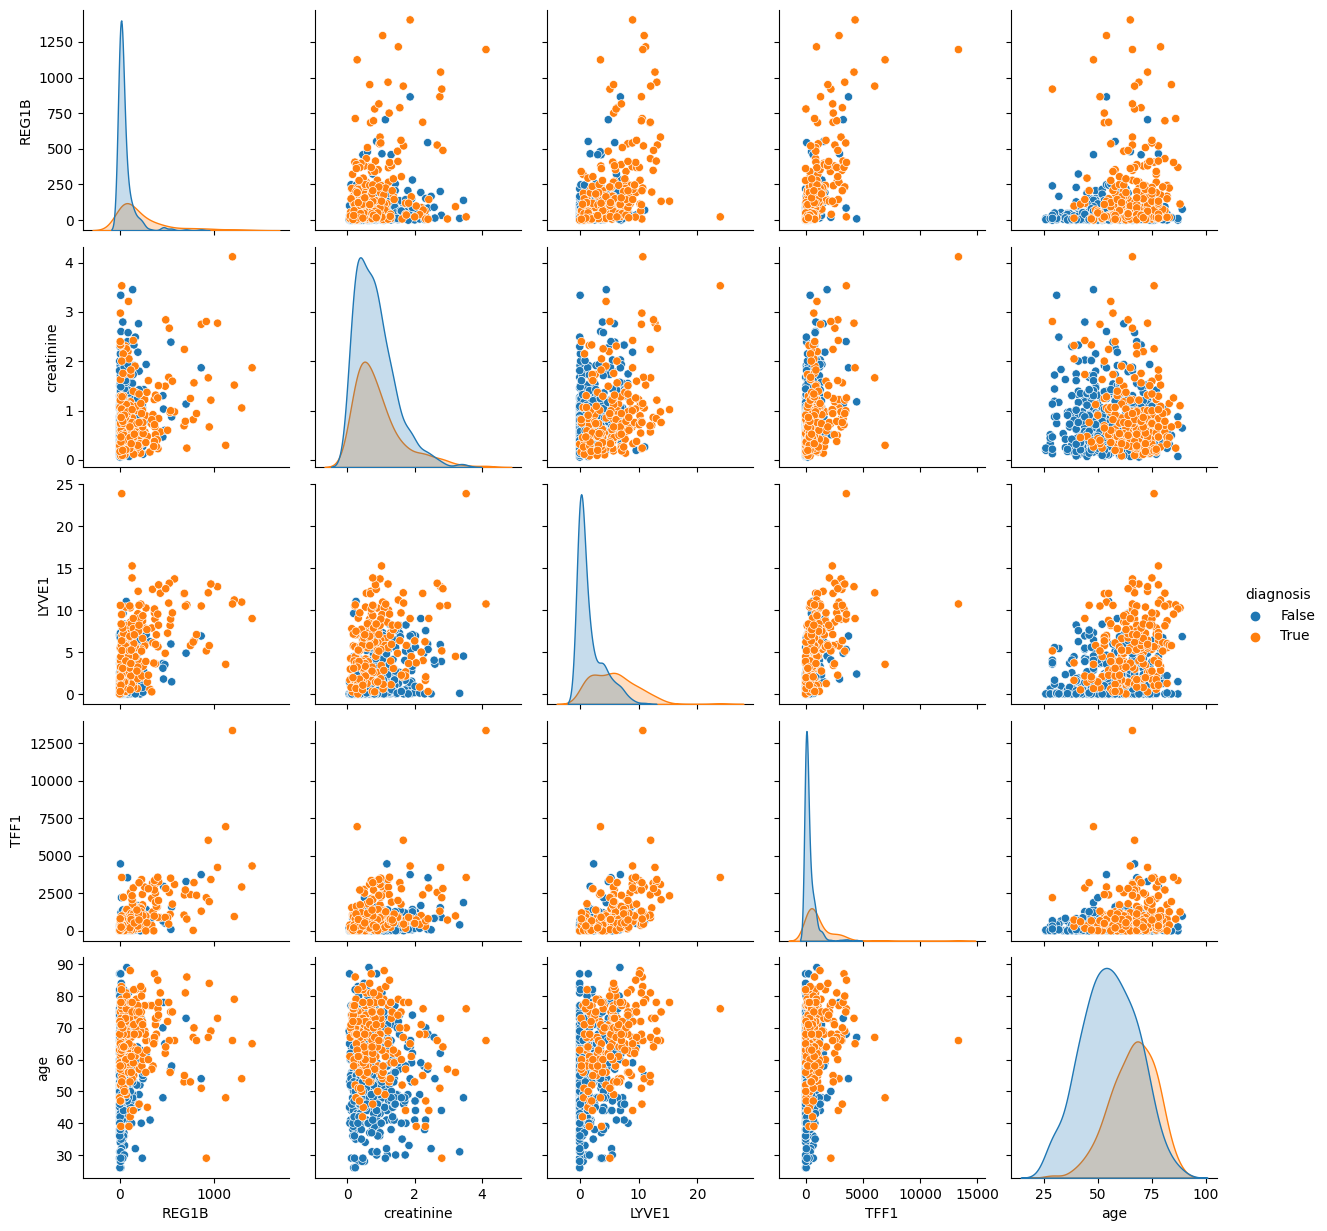

In [19]:
#Plot correlations between each group
sns.pairplot(data = df, vars=['REG1B', 'creatinine', 'LYVE1', 'TFF1', 'age'], hue='diagnosis', diag_kind='kde')

Best parameters:  {'rf__max_depth': None, 'rf__n_estimators': 100}
Best score:  0.8622340425531915
Test set accuracy:  0.864406779661017


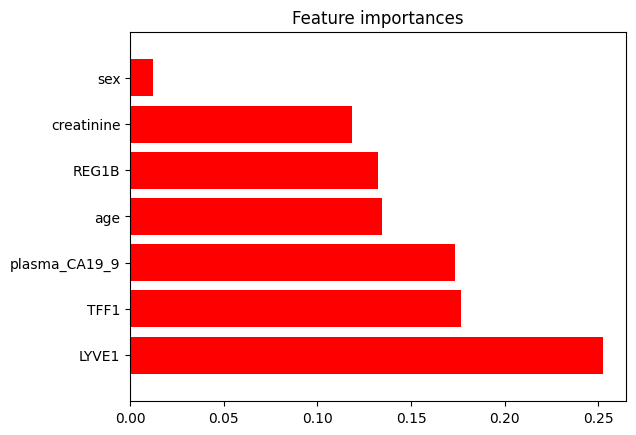

In [20]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.impute import SimpleImputer

X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# This is a pipeline for RandomForest, which uses the Simpleimputer to change the obtained values to mean.
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('rf', RandomForestClassifier())
])

# Define the grid of parameters to search over
param_grid = {
    'rf__n_estimators': [100],
    'rf__max_depth': [None, 5, 10]
}

# Create the grid search object
grid_search = GridSearchCV(pipeline, param_grid, cv=10)

# Fit it to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# Select the best model
best_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred = best_model.predict(X_test)

# Print the accuracy of the best model on the test set
print("Test set accuracy: ", accuracy_score(y_test, y_pred))

# Get feature importances from the best model
importances = best_model.named_steps['rf'].feature_importances_

# Sort the feature importances in descending order and get the indices
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure()
plt.title("Feature importances")
plt.barh(range(X_train.shape[1]), importances[indices],
       color="r", align="center")
plt.yticks(range(X_train.shape[1]), X_train.columns[indices])
plt.ylim([-1, X_train.shape[1]])
plt.show()

Best parameters:  {'xgb__learning_rate': 0.2, 'xgb__n_estimators': 50}
Best score:  0.8580515117581188
Classification report: 
               precision    recall  f1-score   support

       False       0.95      0.90      0.92        80
        True       0.81      0.89      0.85        38

    accuracy                           0.90       118
   macro avg       0.88      0.90      0.89       118
weighted avg       0.90      0.90      0.90       118

Balanced accuracy:  0.8973684210526316


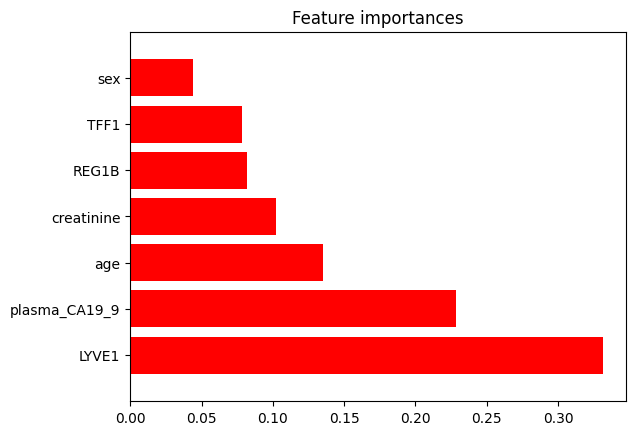

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import  classification_report, balanced_accuracy_score

X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline for scaling and XGBoost
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', XGBClassifier(eval_metric='logloss'))
])

# Define the grid of parameters to search over
param_grid = {
    'xgb__n_estimators': [50, 100, 200],
    'xgb__learning_rate': [0.01, 0.1, 0.2]
}

# Create the grid search object
grid_search = GridSearchCV(pipeline, param_grid, cv=5)

# Fit the grid search object to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# Select the best model
best_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred = best_model.predict(X_test)

# Print the classification report
print("Classification report: \n", classification_report(y_test, y_pred))

# Print the balanced accuracy
print("Balanced accuracy: ", balanced_accuracy_score(y_test, y_pred))

# Get feature importances from the best model
importances = best_model.named_steps['xgb'].feature_importances_

# Sort the feature importances in descending order and get the indices
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure()
plt.title("Feature importances")
plt.barh(range(X_train.shape[1]), importances[indices],
       color="r", align="center")
plt.yticks(range(X_train.shape[1]), X_train.columns[indices])
plt.ylim([-1, X_train.shape[1]])
plt.show()

In [22]:
#first try with lightGBM Model - No Hyperparameter Tuning
from sklearn.metrics import accuracy_score
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)
max_depth=7
num_leaves = 2^(max_depth)
y_pred=clf.predict(X_test)
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)*100))

[LightGBM] [Info] Number of positive: 161, number of negative: 311
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000199 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 727
[LightGBM] [Info] Number of data points in the train set: 472, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.341102 -> initscore=-0.658389
[LightGBM] [Info] Start training from score -0.658389
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [23]:
#Adding hyperparameters to lightgbm model to increase accuracy and analyze root mean squared error to measure average of predicted values and actual values
import lightgbm as lgb
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameters
params = {
    'boosting_type': 'gbdt',        # Gradient Boosting Type
    'objective': 'regression',      # Regression task
    'metric': 'rmse',              # Root Mean Squared Error as the evaluation metric
    'num_leaves': 31,              # Maximum number of leaves in one tree
    'learning_rate': 0.05,         # Learning rate (shrinkage)
    'feature_fraction': 0.9,       # Fraction of features to be used in each boosting round
    'bagging_fraction': 0.8,       # Fraction of data to be used for bagging
    'bagging_freq': 5,             # Frequency for bagging
    'verbose': 0                   # Controls the level of LightGBM's verbosity
}

# Create a LightGBM dataset for training
train_data = lgb.Dataset(X_train, label=y_train)

# Train the model
num_round = 150
bst = lgb.train(params, train_data, num_round)

# Make predictions on the test set
y_pred = bst.predict(X_test, num_iteration=bst.best_iteration)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [24]:
#LightGBM Model with hyperparameters to get accuracy now
import lightgbm as lgb
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameters for classification
params = {
    'boosting_type': 'gbdt',        # Gradient Boosting Type
    'objective': 'binary',         # Binary classification task
    'metric': 'binary_error',      # Binary classification error as the evaluation metric
    'num_leaves': 31,              # Maximum number of leaves in one tree
    'learning_rate': 0.025,         # Learning rate (shrinkage)
    'feature_fraction': 0.9,       # Fraction of features to be used in each boosting round
    'bagging_fraction': 0.8,       # Fraction of data to be used for bagging
    'bagging_freq': 5,             # Frequency for bagging
    'verbose': 1                   # Controls the level of LightGBM's verbosity
}

# Create a LightGBM dataset for training
train_data = lgb.Dataset(X_train, label=y_train)

# Train the model
num_round = 150
bst = lgb.train(params, train_data, num_round)

# Make predictions on the test set
y_pred_prob = bst.predict(X_test, num_iteration=bst.best_iteration)
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion)

classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)
#BEST MODEL SO FAR - 91%

[LightGBM] [Info] Number of positive: 161, number of negative: 311
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.019847 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 727
[LightGBM] [Info] Number of data points in the train set: 472, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.341102 -> initscore=-0.658389
[LightGBM] [Info] Start training from score -0.658389
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

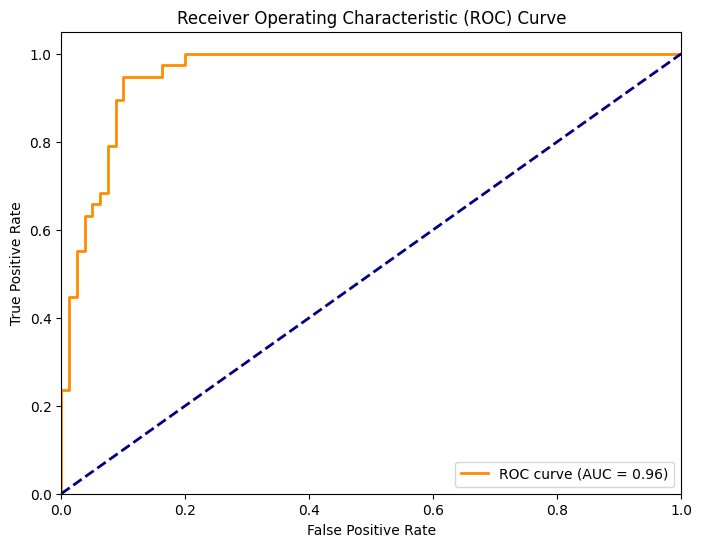

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
#ROC Curve of 96%, very accurate!

In [31]:
#trying to train extratreesclassifier model
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=100,max_depth=6,min_samples_split=2,min_weight_fraction_leaf =0.0,n_jobs=-1)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test)*100)
y_pred9 = clf.predict(X_test)

83.89830508474576


In [32]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameters for the Random Forest Classifier
params = {
    'n_estimators': 100,           # Number of decision trees in the forest
    'max_depth': 20,              # Maximum depth of each decision tree
    'min_samples_split': 2,       # Minimum number of samples required to split a node
    'min_samples_leaf': 1,        # Minimum number of samples required at each leaf node
    'max_features': 'auto',       # Number of features to consider for the best split
    'random_state': 42            # Random seed for reproducibility
}

# Create a Random Forest Classifier with hyperparameters
rf_classifier = RandomForestClassifier(**params)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion)

classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Accuracy: 0.87
Confusion Matrix:
 [[71  9]
 [ 6 32]]
Classification Report:
               precision    recall  f1-score   support

       False       0.92      0.89      0.90        80
        True       0.78      0.84      0.81        38

    accuracy                           0.87       118
   macro avg       0.85      0.86      0.86       118
weighted avg       0.88      0.87      0.87       118



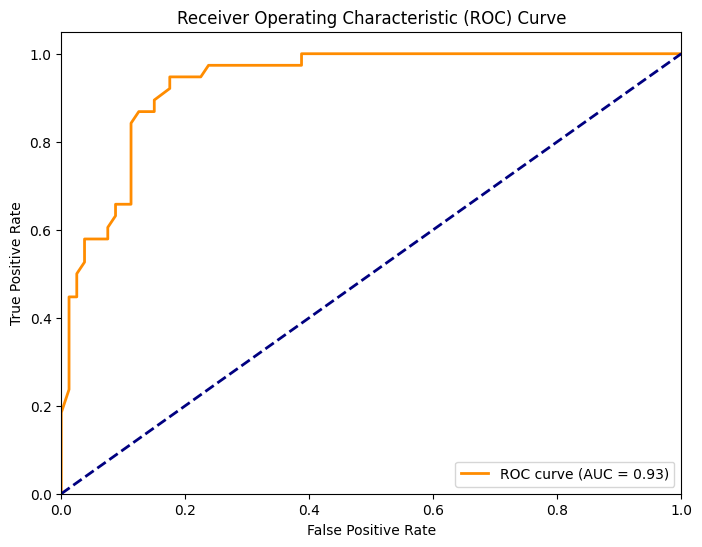

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
params = {
    'n_estimators': 100,           # Number of decision trees in the forest
    'max_depth': 3,               # Maximum depth of each decision tree
    'min_samples_split': 2,       # Minimum number of samples required to split a node
    'min_samples_leaf': 1,        # Minimum number of samples required at each leaf node
    'max_features': 'auto',       # Number of features to consider for the best split
    'random_state': 42            # Random seed for reproducibility
}
y_prob_two = rf_classifier.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob_two)
roc_auc = roc_auc_score(y_test, y_prob_two)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [34]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a range of hyperparameters for tuning
param_grid = {
    'n_estimators': [100, 200, 300],          # Number of boosting rounds
    'max_depth': [3, 4, 5],                  # Maximum depth of trees
    'learning_rate': [0.01, 0.02, 0.03],      # Learning rate (shrinkage)
    'subsample': [0.8, 0.9, 1.0],           # Fraction of samples used for training each tree
    'colsample_bytree': [0.8, 0.9, 1.0],    # Fraction of features used for training each tree
}

# Create an XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(xgb_classifier, param_grid, cv=3, scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the XGBoost model with the best hyperparameters
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', random_state=42, **best_params)
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# You can also print other classification metrics like confusion matrix and classification report
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion)

classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

Fitting 3 folds for each of 243 candidates, totalling 729 fits
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END 

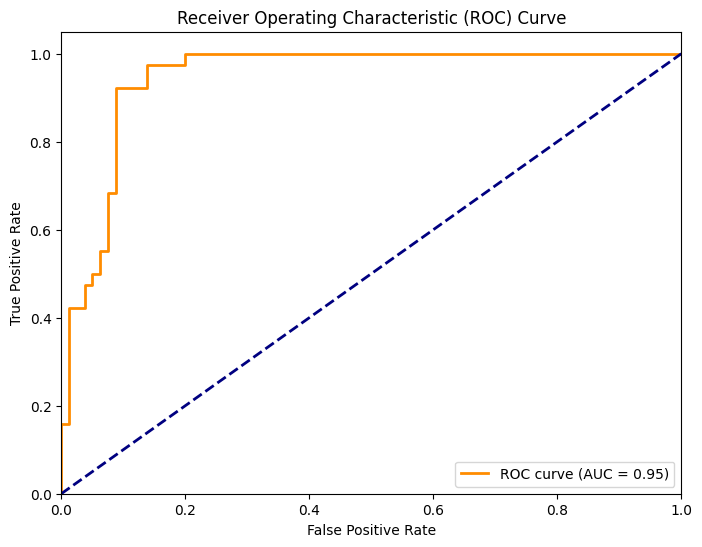

In [36]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
params = {
    'objective': 'binary:logistic',  # Binary classification objective
    'eval_metric': 'logloss',        # Logarithmic loss as the evaluation metric
    'max_depth': 3,                  # Maximum depth of trees
    'learning_rate': 0.1,           # Learning rate (shrinkage)
    'subsample': 0.8,               # Fraction of samples used for training each tree
    'colsample_bytree': 0.8,        # Fraction of features used for training each tree
    'random_state': 42
}
y_pred = xgb_classifier.predict(X_test)
y_prob = xgb_classifier.predict_proba(X_test)[:, 1]  # Predicted probabilities for class 1

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

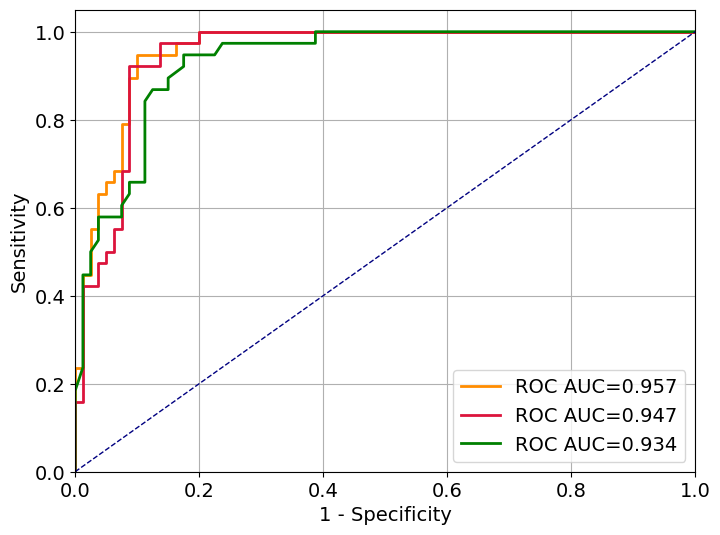

In [37]:
import matplotlib.pyplot as plt
import matplotlib
def roc_curve_and_score(y_test, pred_proba):
    fpr, tpr, _ = roc_curve(y_test.ravel(), pred_proba.ravel())
    roc_auc = roc_auc_score(y_test.ravel(), pred_proba.ravel())
    return fpr, tpr, roc_auc


plt.figure(figsize=(8, 6))
matplotlib.rcParams.update({'font.size': 14})
plt.grid()
#LightGBM Model
fpr, tpr, roc_auc = roc_curve_and_score(y_test, y_pred_prob)
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label='ROC AUC={0:.3f}'.format(roc_auc))
#XGBoost Model
fpr, tpr, roc_auc = roc_curve_and_score(y_test, y_prob)
plt.plot(fpr, tpr, color='crimson', lw=2,
         label='ROC AUC={0:.3f}'.format(roc_auc))
#RandomForest Classifier Model
fpr, tpr, roc_auc = roc_curve_and_score(y_test, y_prob_two)
plt.plot(fpr, tpr, color='green', lw=2,
         label='ROC AUC={0:.3f}'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.legend(loc="lower right")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.show()

In [35]:
#Light GBM Model and XGBoost Model have same accuracy of 91%, but LightGBM has a higher ROC AUC, thus making it slightly more accurate.

In [38]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameters for the SVM classifier
svm_params = {
    'C': 1,            # Regularization parameter
    'kernel': 'rbf',     # Kernel function ('linear', 'rbf', 'poly', etc.)
    'gamma': 'scale'     # Kernel coefficient for 'rbf' (you can use 'auto' or a float)
}

# Create an SVM classifier with hyperparameters
svm_classifier = SVC(**svm_params)

# Train the SVM model
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion)

classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

Accuracy: 0.80
Confusion Matrix:
 [[77  3]
 [21 17]]
Classification Report:
               precision    recall  f1-score   support

       False       0.79      0.96      0.87        80
        True       0.85      0.45      0.59        38

    accuracy                           0.80       118
   macro avg       0.82      0.70      0.73       118
weighted avg       0.81      0.80      0.78       118



In [39]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100)

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

# performing predictions on the test dataset
y_pred8 = clf.predict(X_test)

In [40]:
# metrics are used to find accuracy or error
from sklearn import metrics
print()

# using metrics module for accuracy calculation
print( metrics.accuracy_score(y_test, y_pred8)*100)


83.05084745762711


In [41]:
# grab tools from our tensorflow and keras toolboxes!
import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization
from keras.callbacks import ModelCheckpoint
from keras import optimizers
from keras.layers import Activation, MaxPooling2D, Dropout, Flatten, InputLayer, Reshape, Dense, Conv2D, GlobalAveragePooling2D, BatchNormalization

In [42]:
model_1 = Sequential()
model_1.add(InputLayer(input_shape=(7,)))
model_1.add(Dense(100, activation = 'relu'))
model_1.add(Dense(1, activation = 'softmax'))
model_1.compile(loss='binary_crossentropy',
                optimizer = 'adam',
                metrics = ['accuracy'])
### END CODE

In [43]:
#CCNN Model
monitor = ModelCheckpoint('./model.h5', monitor='val_accuracy', verbose=0, save_best_only=True, save_weights_only=False, mode='auto', save_freq='epoch')
model_1.fit(X_train, y_train, epochs = 100, validation_data = (X_test, y_test), shuffle = True, callbacks = [monitor])

Epoch 1/100
15/15 [==============================] - 1s 28ms/step - loss: 31.3251 - accuracy: 0.3411 - val_loss: 7.0662 - val_accuracy: 0.3220
Epoch 2/100
15/15 [==============================] - 0s 7ms/step - loss: 9.3443 - accuracy: 0.3411 - val_loss: 5.5343 - val_accuracy: 0.3220
Epoch 3/100
 1/15 [=>............................] - ETA: 0s - loss: 10.5410 - accuracy: 0.3750

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


15/15 [==============================] - 0s 6ms/step - loss: 4.5580 - accuracy: 0.3411 - val_loss: 2.4165 - val_accuracy: 0.3220
Epoch 4/100
15/15 [==============================] - 0s 8ms/step - loss: 2.5187 - accuracy: 0.3411 - val_loss: 1.7838 - val_accuracy: 0.3220
Epoch 5/100
15/15 [==============================] - 0s 6ms/step - loss: 2.1168 - accuracy: 0.3411 - val_loss: 1.3502 - val_accuracy: 0.3220
Epoch 6/100
15/15 [==============================] - 0s 6ms/step - loss: 1.8021 - accuracy: 0.3411 - val_loss: 1.1983 - val_accuracy: 0.3220
Epoch 7/100
15/15 [==============================] - 0s 6ms/step - loss: 1.4360 - accuracy: 0.3411 - val_loss: 1.0378 - val_accuracy: 0.3220
Epoch 8/100
15/15 [==============================] - 0s 7ms/step - loss: 1.2602 - accuracy: 0.3411 - val_loss: 0.9375 - val_accuracy: 0.3220
Epoch 9/100
15/15 [==============================] - 0s 7ms/step - loss: 0.9947 - accuracy: 0.3411 - val_loss: 1.0392 - val_accuracy: 0.3220
Epoch 10/100
15/15 [=====

Epoch 1/100
14/14 [==============================] - 11s 117ms/step - loss: 0.6179 - accuracy: 0.6509 - val_loss: 0.4759 - val_accuracy: 0.7500
Epoch 2/100
14/14 [==============================] - 0s 20ms/step - loss: 0.5765 - accuracy: 0.7028 - val_loss: 0.4757 - val_accuracy: 0.7500
Epoch 3/100
14/14 [==============================] - 0s 20ms/step - loss: 0.5649 - accuracy: 0.7028 - val_loss: 0.4216 - val_accuracy: 0.8958
Epoch 4/100
14/14 [==============================] - 0s 21ms/step - loss: 0.5441 - accuracy: 0.7075 - val_loss: 0.3949 - val_accuracy: 0.8333
Epoch 5/100
14/14 [==============================] - 0s 13ms/step - loss: 0.5464 - accuracy: 0.7453 - val_loss: 0.4440 - val_accuracy: 0.8333
Epoch 6/100
14/14 [==============================] - 0s 9ms/step - loss: 0.5619 - accuracy: 0.7099 - val_loss: 0.4214 - val_accuracy: 0.8542
Epoch 7/100
14/14 [==============================] - 0s 9ms/step - loss: 0.5396 - accuracy: 0.7547 - val_loss: 0.4100 - val_accuracy: 0.8125
Epoch 

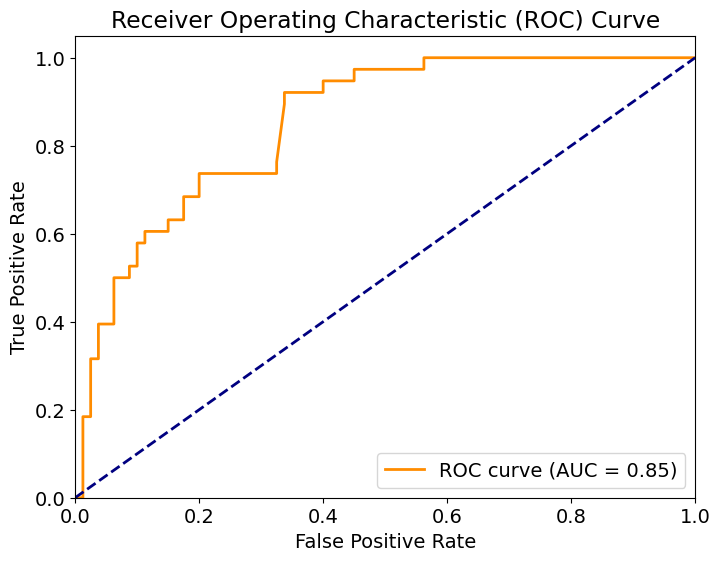

Accuracy: 0.78
Precision: 0.73
Recall: 0.50
F1-score: 0.59


In [44]:
#1D CNN-LSTM Model - achieved 97% accuracy on other research paper but only achieved 80% on this dataset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Flatten
from tensorflow.keras.optimizers import Adam

df = df[['LYVE1',
         'REG1B',
         'TFF1',
         'diagnosis']].copy()
# Left out creatinine, plasma_CA19_9, age, and sex to try and mimic research paper's success
# Create a 1D CNN-LSTM model
model = Sequential()
model.add(InputLayer(input_shape=(7,1,)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(7,)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(50, activation='linear'))
model.add(Dense(1, activation='sigmoid'))


# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Print metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X_train),len(X_test)

(472, 118)

In [ ]:
X_train_1=np.array(X_train)
y_train_1=np.array(y_train)
X_train_1

array([[1.39113000e+00, 6.54002944e+02, 5.60000000e+01, ...,
        2.98465100e+00, 4.81196300e+01, 2.69088550e+02],
       [7.46460000e-01, 6.54002944e+02, 5.80000000e+01, ...,
        1.60031300e+00, 1.75833700e+01, 8.71729842e+01],
       [5.31570000e-01, 0.00000000e+00, 5.00000000e+01, ...,
        5.04609800e-03, 5.38144500e+00, 5.04609800e+00],
       ...,
       [5.08950000e-01, 2.40000000e+01, 5.00000000e+01, ...,
        4.05358700e+00, 1.97779540e+01, 2.20653180e+03],
       [1.13100000e+00, 4.76000000e+02, 6.10000000e+01, ...,
        6.59851900e+00, 8.94324200e+01, 3.45623553e+02],
       [1.92270000e-01, 6.94000000e+00, 5.10000000e+01, ...,
        5.71180600e-01, 3.09921100e+00, 3.97291311e+01]])

In [ ]:
X_test.dtypes

creatinine       float64
plasma_CA19_9    float64
age                int64
sex                int64
LYVE1            float64
REG1B            float64
TFF1             float64
dtype: object

In [ ]:
import lightgbm as lgb
lc=lgb.LGBMClassifier()
lc.fit(X_train,y_train)

[LightGBM] [Info] Number of positive: 161, number of negative: 311
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000061 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 727
[LightGBM] [Info] Number of data points in the train set: 472, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.341102 -> initscore=-0.658389
[LightGBM] [Info] Start training from score -0.658389
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

LGBMClassifier()

In [ ]:
X_test

,creatinine,plasma_CA19_9,age,sex,LYVE1,REG1B,TFF1
522,1.56078,2114.000000,70,1,6.358314,788.087250,3210.585000
284,2.02449,21.000000,47,1,5.570366,28.080227,982.911300
514,0.21489,9250.000000,77,0,1.712249,20.536467,232.715800
331,0.90480,654.002944,43,1,0.495710,52.419335,866.664053
210,1.13100,9.000000,73,1,4.860454,704.236000,3283.593000
...,...,...,...,...,...,...,...
550,0.27144,654.002944,65,1,3.682237,361.897760,0.021172
109,0.18096,654.002944,55,1,2.101149,8.038081,25.096922
361,0.82563,1.000000,58,1,0.003303,5.519000,83.180000
340,0.61074,654.002944,80,1,6.698661,7.420854,61.373998


In [ ]:
y_pred=lc.predict(X_test)
y_pred

array([ True, False,  True, False, False, False, False, False,  True,
       False,  True, False,  True, False,  True, False, False,  True,
        True, False, False, False, False, False, False, False, False,
        True, False, False, False, False,  True, False, False, False,
        True, False,  True, False, False, False, False, False,  True,
        True, False,  True, False,  True, False,  True, False,  True,
       False,  True, False, False, False,  True, False,  True,  True,
       False, False, False, False, False,  True, False,  True, False,
        True, False, False,  True, False, False, False,  True, False,
       False,  True, False, False,  True, False,  True, False,  True,
       False, False,  True, False,  True, False, False, False,  True,
       False, False, False,  True, False,  True,  True, False, False,
       False, False, False,  True, False,  True, False, False,  True,
       False])

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,balanced_accuracy_score
cm=confusion_matrix(y_pred,y_test)
print(cm)
accuracy_score(y_pred,y_test)*100

[[73  5]
 [ 7 33]]


89.83050847457628